## Plots

In [1]:
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from functools import lru_cache
from tools import load_json

Find most traded token pairs on observed chain

In [2]:
def most_traded(chain):
    all_swap_transactions = load_json(f"data/{chain}/all_swap_transactions.json")

    tuples = []
    for pair in all_swap_transactions.keys():
        if all_swap_transactions[pair] is not None:
            for val in all_swap_transactions[pair]:
                tuples.append((pair, val))

    df = pd.DataFrame(tuples, columns=["pair", "txhash"])
    counts = df.groupby("pair").count()
    max_counts = counts.max()
    mask = (counts > 250).values
    print(counts[mask])

most_traded("Harmony_value")

                                            txhash
pair                                              
0x1970f700091772EE229Aa9640e580956383ebECd     424
0x1E35802a66F5346b350ab10169Cc7868dCd0c32d    1309
0x2eF8A1A738f291C1c490E08E600E6b267522eFb8     418
0x4ce590ed844401F2A92Df4Cd0dAD5CBd7d74bECB     292
0x5aC1BFE33A07c11dD97cf0f6C3245B67A49878e1     463
0x60e0d939D4b0C71918088278bCf600470A6c8f26     470
0x6eE53848A8c835FF95c68fC4Dfc06bE9Eb24299D     567
0x772b8B924d197108c5cc9483DC7bFd7A15a0a513     735
0x7E506951f196Bc4504aB4557BB856d1043497C0B    1378
0x9C358D2e91bf1d1a7eCA1C5A934BE98Cf4f8D10c     254
0xB7BF23aC529190E20C1691b35EfACd46Da7EE26f     571
0xCDe0A00302CF22B3Ac367201FBD114cEFA1729b4    2010
0xEb579ddcD49A7beb3f205c9fF6006Bb6390F138f     494
0xb5ba2A4c89e3d3950ffE7A75dbF5Bb3B23B07B81     413
0xb6E0a227d840d75b1ff2f01353A59D90b5d4eD7C     280
0xf33ee94922326d7C1d220298Cc9428A1Fd15dAea     387


In [3]:
def calculate_times(configname):
    config = f"configs/config_{configname}.json"
    config = load_json(config)
    poolstart_times = load_json(f"data/{config['name']}/poolstart_times.json")
    all_swap_transactions = load_json(f"data/{config['name']}/all_swap_transactions.json")
    swap_to_info = load_json(f"data/{config['name']}/swap_to_info.json")

    poolstart_times = poolstart_times["any"]

    pairs = list()
    first_buy_difference = list()

    pairs_all_times = list()
    swap_all_times = list()
    all_time_diffs = list()
    poolstarts = list()

    for pair in poolstart_times.keys():
        if poolstart_times[pair] is None:
            continue
        poolstart = poolstart_times[pair]["timestamp"]
        swap_hashes = all_swap_transactions[pair]
        if swap_hashes is None:
            continue

        times = list()
        for swap_hash in swap_hashes:
            pairs_all_times.append(pair)
            swap_all_times.append(swap_hash)
            all_time_diffs.append(swap_to_info[swap_hash]["timestamp"] - poolstart)
            times.append(swap_to_info[swap_hash]["timestamp"])

        if len(times) == 0:
            continue
        first_swap_time = min(times)
        pairs.append(pair)
        poolstarts.append(poolstart)
        first_buy_difference.append(first_swap_time - poolstart)

    df = pd.DataFrame({"pair": pairs, "first_buy_speed": first_buy_difference, "poolstart": poolstarts})
    return df

In [4]:
def get_all_buys(configname):
    config = f"configs/config_{configname}.json"
    config = load_json(config)
    poolstart_times = load_json(f"data/{config['name']}/poolstart_times.json")
    all_swap_transactions = load_json(f"data/{config['name']}/all_swap_transactions.json")
    swap_to_info = load_json(f"data/{config['name']}/swap_to_info.json")

    poolstart_times = poolstart_times["any"]

    pairs = list()
    first_buy_difference = list()

    pairs_all_times = list()
    swap_all_times = list()
    all_time_diffs = list()
    poolstarts = list()
    values = list()

    for pair in poolstart_times.keys():
        if poolstart_times[pair] is None:
            continue
        poolstart = poolstart_times[pair]["timestamp"]
        swap_hashes = all_swap_transactions[pair]
        if swap_hashes is None:
            continue

        times = list()
        for swap_hash in swap_hashes:
            pairs_all_times.append(pair)
            swap_all_times.append(swap_hash)
            all_time_diffs.append(swap_to_info[swap_hash]["timestamp"] - poolstart)
            pairs.append(pair)
            poolstarts.append(poolstart)
            values.append(swap_to_info[swap_hash]["value"])

    df = pd.DataFrame({"pair": pairs, "Time": all_time_diffs, "Value": values, "swap_hash": swap_all_times})
    return df

In [5]:
def get_swap_times(pair):
    poolstart_times = load_json(f"data/Harmony_value/poolstart_times.json")
    all_swap_transactions = load_json(f"data/Harmony_value/all_swap_transactions.json")
    swap_to_info = load_json(f"data/Harmony_value/swap_to_info.json")

    poolstart_times = poolstart_times["any"]
    swaps = pd.DataFrame(columns=["Time", "Value"])

    if poolstart_times[pair] is None:
        return
    poolstart = poolstart_times[pair]["timestamp"]
    swap_hashes = all_swap_transactions[pair]
    if swap_hashes is None:
        return

    for swap_hash in swap_hashes:
        row = {"swap_hash": swap_hash, "Time": swap_to_info[swap_hash]["timestamp"] - poolstart, "Value": swap_to_info[swap_hash]["value"]}
        #if(row["Value"] != 0):
        swaps = swaps.append(row, ignore_index = True)


    return swaps

In [6]:
allPairs = calculate_times("Harmony_value")
allPairs

pair  first_buy_speed   poolstart
0     0xBf255d8c30DbaB84eA42110EA7DC870F01c0013A               42  1617431699
1     0x3046ed650E06778c0B7eCa7D066fe33B073f1877              286  1617814162
2     0x63775Cc927f0ebFCdaDe03CBa38868bf81b8f2e0              510  1617973999
3     0xd5dAEF0264532bF34A01B4e36F3aa686a904f30b              755  1618122876
4     0x0981D7353261Ba15d1682E3DC01332E6c0E9efB1               57  1618236568
...                                          ...              ...         ...
2324  0xee31Bd5c43D167e69f2d3b0aDc798601e5492D5c               18  1650625269
2325  0x3269bB3FDc794c124237278193c3eDb6497E15B9              117  1650743311
2326  0xDA1140453583b9594d44Ba507b821f62394b51a7                8  1650896191
2327  0x41c46952Fa2d0ed7Fa9c1ffC6f11506b16f50af7              205  1650904116
2328  0xc2915130658A1C6C24d1475B9595A91f1Bf268cc             1696  1650966318

[2329 rows x 3 columns]

In [7]:
most_traded = ['0xCDe0A00302CF22B3Ac367201FBD114cEFA1729b4', #HRC20 Star and HRC20 Wrapped ONE
               '0x7E506951f196Bc4504aB4557BB856d1043497C0B', #HRC20 JOC and HRC20 Wrapped ONE
               '0x1E35802a66F5346b350ab10169Cc7868dCd0c32d'] #HRC20 Wrapped ONE and HRC20 Reverse Token

swaps1 = get_swap_times(most_traded[0])
swaps1

Time                    Value  \
0       53  80000000000000000000000   
1       70   3000000000000000000000   
2       70   6500000000000000000000   
3       70                        0   
4       70                        0   
...    ...                      ...   
2005  2414                        0   
2006  2414   1000000000000000000000   
2007  2414                        0   
2008  2417                        0   
2009  2417                        0   

                                              swap_hash  
0     0xa0e6553b86473d4b69c9390ddf5bc76107798996baec...  
1     0xf3944e67fb16416fd2cc3b953f983026763c8156b1d6...  
2     0x0c8e858bbdd19eb0e128c6e224318feaf94e69237a73...  
3     0xc7393dfcaac3fabc08030f4590075a9048b70a775929...  
4     0xc7393dfcaac3fabc08030f4590075a9048b70a775929...  
...                                                 ...  
2005  0xb81666412fe5ebd429e0ea9e5454536782fe58a060dd...  
2006  0x4187cb80869b894445a40db357f16a182ed7c95f3f94...  
2007  0x31dda23e26f7cd38748dfcdb6687d928bdc7b9f7ee24...  
2008  0x6c4e24a5cc4849944abce4b33250548c6bd65692dd75...  
2009  0x2df0dd3990c4f3f8847ee0651e1d30976352d3988023...  

[2010 rows x 3 columns]

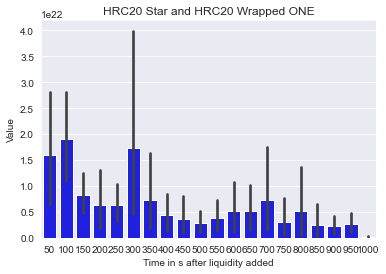

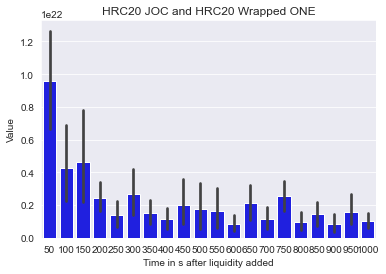

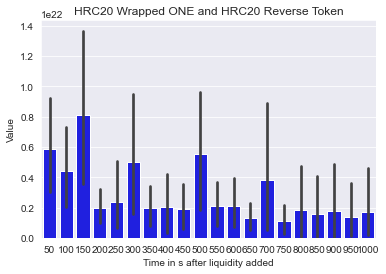

In [8]:
sns.set_style('darkgrid')

titles = ['HRC20 Star and HRC20 Wrapped ONE',
          'HRC20 JOC and HRC20 Wrapped ONE',
          'HRC20 Wrapped ONE and HRC20 Reverse Token']
time_lab=[50,100,150,200,250,300,350,400,450,500,550,600,650,700,750,800,850,900,950,1000]

i=0
for pair in most_traded:
    times = get_swap_times(pair)
    times = times.loc[times["Time"] < 1000]
    times["Value"] = pd.to_numeric(times["Value"])
    times["Time"] = pd.to_numeric(times["Time"])
    times['timegroup'] = pd.qcut(times['Time'], 20)
    sns.barplot(x='timegroup', y='Value', data=times, color='blue').set(title=titles[i], xticklabels=time_lab, xlabel='Time in s after liquidity added')
    plt.show()
    i = i+1

C:\Users\Tom\.conda\envs\AKNUM\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


first_buy_speed    0.501202
poolstart         -0.827349
dtype: float64


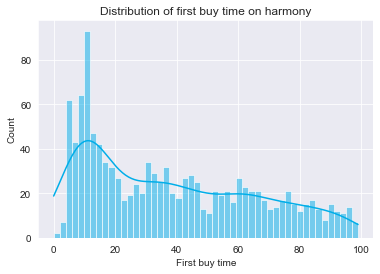

C:\Users\Tom\.conda\envs\AKNUM\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


first_buy_speed    3.154720
poolstart          0.420707
dtype: float64


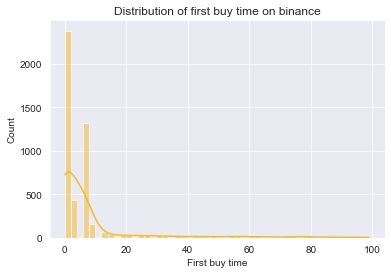

first_buy_speed    1.559711
poolstart         -0.053390
dtype: float64


C:\Users\Tom\.conda\envs\AKNUM\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


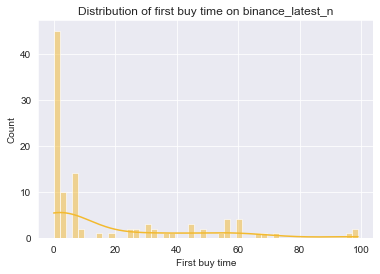

C:\Users\Tom\.conda\envs\AKNUM\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


first_buy_speed    0.939866
poolstart          0.519255
dtype: float64


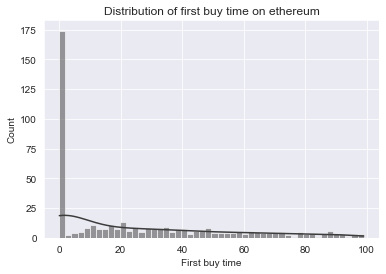

C:\Users\Tom\.conda\envs\AKNUM\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


first_buy_speed    0.457164
poolstart         -0.754929
dtype: float64


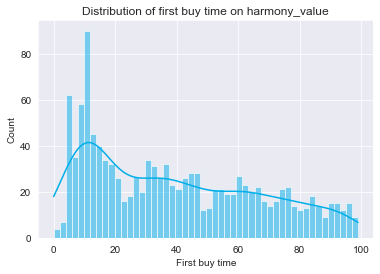

In [9]:
confignames = ["harmony", "binance", "binance_latest_n", "ethereum", "harmony_value"]
color = ["#00aee9", "#F3BA2F", "#F3BA2F", "#3c3c3d", "#00AEE9"]
dfs = list(map(calculate_times, confignames))

i=0
for df in dfs:
    df_first_minute = df[df["first_buy_speed"] < 100]
    print(df_first_minute.skew(axis = 0, skipna = True))
    sns.histplot(df_first_minute['first_buy_speed'], kde=True, bins=50, color=color[i])\
        .set(title=('Distribution of first buy time on ' + confignames[i]), xlabel='First buy time')
    plt.show()
    i = i+1

C:\Users\Tom\.conda\envs\AKNUM\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Tom\.conda\envs\AKNUM\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Tom\.conda\envs\AKNUM\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

[Text(0.5, 1.0, 'Title'),
 [Text(0, 0, '50'),
  Text(1, 0, '100'),
  Text(2, 0, '150'),
  Text(3, 0, '200'),
  Text(4, 0, '250'),
  Text(5, 0, '300'),
  Text(6, 0, '350'),
  Text(7, 0, '400'),
  Text(8, 0, '450'),
  Text(9, 0, '500'),
  Text(10, 0, '550'),
  Text(11, 0, '600'),
  Text(12, 0, '650'),
  Text(13, 0, '700'),
  Text(14, 0, '750'),
  Text(15, 0, '800'),
  Text(16, 0, '850'),
  Text(17, 0, '900'),
  Text(18, 0, '950'),
  Text(19, 0, '1000')],
 Text(0.5, 0, 'Time in s after liquidity added')]

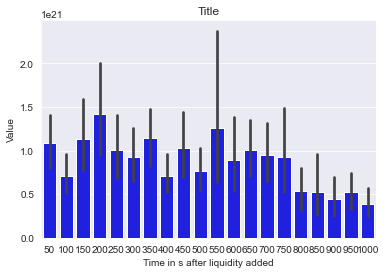

In [10]:
all_harmony = get_all_buys("harmony")
df_first_minute = all_harmony[all_harmony["Time"] < 1000]
df_first_minute["Value"] = pd.to_numeric(df_first_minute["Value"])
df_first_minute["Time"] = pd.to_numeric(df_first_minute["Time"])

df_first_minute['timegroup'] = pd.qcut(df_first_minute['Time'], 20)
sns.barplot(x='timegroup', y='Value', data=df_first_minute, color='blue').set(title="Title", xticklabels=time_lab, xlabel='Time in s after liquidity added')

statistics


## Eight experiment

In [11]:
from web3 import Web3
from tools import load_json
import pyhmy
from pyhmy.util import convert_one_to_hex
import networkx as nx
import matplotlib.pyplot as plt

C:\Users\Tom\.conda\envs\AKNUM\lib\site-packages\pyhmy\__init__.py:27: ImportWarning: `pyhmy` does not work on Windows or Cygwin.
  "`pyhmy` does not work on Windows or Cygwin."


In [ ]:
@lru_cache(maxsize=None)
def query_in_txes(address, page_size=100, max_pages=10):
    relevant_txes = list()
    try:
        n = pyhmy.account.get_transactions_count(address, tx_type='RECEIVED', endpoint="https://api.harmony.one/")
    except Exception as exc:
        print(exc)
        print("ignoring actual amount of incoming transactions")
        n = page_size*max_pages

    print(f"{n} incoming")
    n_pages = n // page_size +1
    for page in range(min(max_pages,n_pages)):
        print(page)
        txes_ = pyhmy.account.get_transaction_history(address, page=page, page_size=page_size, tx_type="RECEIVED", include_full_tx=True, endpoint="https://api.harmony.one/")
        txes  = [tx for tx in txes_ if len(tx["to"]) >0]
        tos  = [convert_one_to_hex(tx["to"]) for tx in txes]
        relevant_txes_block = [txes[i] for i in range(len(txes)) if tos[i] == address]
        relevant_txes += relevant_txes_block
        time.sleep(0.2)

    return relevant_txes

In [13]:
def n_hop_in_txes(address, n_hops, pages_size=100, max_pages=10):

    assert n_hops>=1
    in_addresses = [address]
    graphinfo = set()
    queried = set()
    for j in range(n_hops):




        addresses_to_query = list(set(in_addresses) - queried)
        len_to_query = len(addresses_to_query)

        for i in range(len_to_query):
            print(f"{j + 1}-th out of {n_hops} hops, {i + 1}-th input out of {len_to_query}")
            address_to_query = addresses_to_query[i]
            # query
            relevant_txes = query_in_txes(address_to_query, pages_size, max_pages)

            # build data for graph
            graphinfo_i = set([(convert_one_to_hex(t["from"]), convert_one_to_hex(t["to"])) for t in relevant_txes])
            graphinfo =  list(set(graphinfo) | graphinfo_i)

            # build set to query next
            in_addresses = [graphinfo[k][0] for k in range(len(graphinfo))]
            queried |= set(address_to_query)


    G = nx.DiGraph()
    G.add_edges_from(graphinfo)
    return G

In [14]:
# find spam snipe nodes
# just on harmony
# example on graph 4  0x6fB25f3D3ed5A048cB50E50B0eADcEb49087ad7B
# 1outgoing adress to many wallets and 1 incoming buy address ()
# filter for lowest latency trans (fastest buys)


config_name = "harmony_test"
config = f"configs/config_{config_name}.json"

config = load_json(config)
RPC = config["RPC"]
w3 = Web3(Web3.HTTPProvider(RPC))

# CA 0x6fB25f3D3ed5A048cB50E50B0eADcEb49087ad7B
#  working regular swap: 0x4b8E29C1162Bc583A00ADBAF741891bB04Aedf37 0x564DAFa3424aCfe49419a0EFe96D2758fB6A1dF4
# working regular swap: 0xfc2E3B2e7f81B4f01e05C465509a5e256354C434 0xe5B21f200a8a39E6b677080995Cd5a0e494FF3d2

CA = "0x6fB25f3D3ed5A048cB50E50B0eADcEb49087ad7B"
CA2 = "0xe11C3cE2B96328B10d34DB9AC3ADd4ecc2942D07"

REG1 = "0x4b8E29C1162Bc583A00ADBAF741891bB04Aedf37"
REG2 = "0x564DAFa3424aCfe49419a0EFe96D2758fB6A1dF4"
REG3 = "0xfc2E3B2e7f81B4f01e05C465509a5e256354C434"
REG4 = "0xe5B21f200a8a39E6b677080995Cd5a0e494FF3d2"



In [15]:
def is_spam(graph):
    max_in = 0
    incoming = ""
    max_out = 0
    outgoing = ""
    for n in graph.nodes:
        if graph.in_degree(n) > max_in:
            max_in = graph.in_degree(n)
            incoming = n
        if graph.out_degree(n) > max_out:
            max_out = graph.out_degree(n)
            outgoing = n

    return max_in > 20 and max_out > 20, ((incoming, max_in), (outgoing, max_out))


In [16]:
def is_spam2(graph, to_address):

    # get for each node how many unique paths there are leading to to_address
    # save it in a list
    paths = []
    for n in graph.nodes:
        paths.append((n, len(list(nx.all_simple_paths(graph, n, to_address)))))
    # get the node with the most paths
    result = max(paths, key=lambda x: x[1])

    return result[1] > 20, result, to_address

In [17]:

from tools import load_json
abi_router = load_json("abis/router.json")

def is_router(address): # TODO not used
    try:
        contract_router = w3.eth.contract(address=address, abi=abi_router)
        contract_router.functions.WETH().call()
        contract_router.functions.factory().call()
        return True
    except:
        return False


In [18]:
import time

def get_graph(address):
    if is_router(address):
        return "DEX"
    else:
        return n_hop_in_txes(address, 2)

def get_fromANDto(harmony_reduced_to):
    spams = []
    n = len(harmony_reduced_to)
    for index, to in zip(range(n), harmony_reduced_to):
        print(f"progress {index}/{n}")
        while(True):
            try:
                G = get_graph(to)
                break
            except Exception as ex:
                print(ex)
                print("retrying")
                print(to)
                time.sleep(2)
        spams.append(G)

    return spams


In [19]:
all_harmony = get_all_buys("harmony_value")
all_harmony = all_harmony.drop_duplicates('swap_hash', keep='last')
all_harmony.sort_values("Time")

pair  Time                Value  \
32206  0xf33ee94922326d7C1d220298Cc9428A1Fd15dAea     0                    0   
37444  0x206eF945884a898DE62eACcb061110e964787734     0     1000000000000000   
17130  0xe05978e5C7a9090A9590Ec4D6D33Bd4b8cD111dF     0  5000000000000000000   
37443  0x5C441c97996856f2e4eDAc119b70dB8968C1a6D4     0     1000000000000000   
32187  0x0b1edc4713324e3C0bA0D35bb40081430e5dD416     2       10000000000000   
...                                           ...   ...                  ...   
36556  0x72bE1Ba71a6a02Bfa39d839659E726C915b6B1f3  4388                    0   
13443  0xC546D43CA4Ad4950317246Bb2cE2E62324DdF411  4461  5000000000000000000   
13446  0x3bF58808e1A6d971a5E9fFAD807D5d36Bcd32918  4465                    0   
13444  0xC546D43CA4Ad4950317246Bb2cE2E62324DdF411  4526                    0   
13447  0x3bF58808e1A6d971a5E9fFAD807D5d36Bcd32918  5041                    0   

                                               swap_hash  
32206  0x770933df30ff1201016535416feabdd606252126c245...  
37444  0x74ce234a5f5461db654b1ba13fa9f65a3d5ba988684c...  
17130  0xcc0186525b2cb14a8a10531402a3ac07366fe4641822...  
37443  0x4ca010b3ffefbd5b6a8c7a30435a39e73ead722a1f06...  
32187  0x657a125dad64f68a6089e01d65d107aa1506a55bfdbf...  
...                                                  ...  
36556  0xd5f4ef8fd1460560b08fcb9213abd1839fae94384ee9...  
13443  0x90d4cd144d44222a364d9f29df9a233e031ad74e053d...  
13446  0xefc249da71f1e3cae7baa814dc922ff538d7e3e0aeff...  
13444  0xe1ffe59603aba5c24b3446d191b647eb26c8e41e4bc6...  
13447  0x794eb571c51ce8235daad38fc43cbc04fe562b96528d...  

[34058 rows x 4 columns]

In [36]:
all_harmony = get_all_buys("harmony")
mask = all_harmony["Time"] <= 4
harmony_reduced = all_harmony[mask].reset_index(drop=True)
harmony_reduced = harmony_reduced.drop_duplicates("swap_hash")
harmony_reduced.sort_values("Time")

C:\Users\Tom\.conda\envs\AKNUM\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


pair  Time                Value  \
66   0xe05978e5c7a9090a9590ec4d6d33bd4b8cd111df     0  5000000000000000000   
110  0xf33ee94922326d7c1d220298cc9428a1fd15daea     0                    0   
109  0xfe3a808436b9ab89c5e132aa54532048d14ed641     2       10000000000000   
106  0xa02bdc7659375e56e3d9578ea8a52152d4b77eb7     2                    0   
107  0xa02bdc7659375e56e3d9578ea8a52152d4b77eb7     2                    0   
..                                          ...   ...                  ...   
27   0xb7bf23ac529190e20c1691b35efacd46da7ee26f     4                    0   
26   0xb7bf23ac529190e20c1691b35efacd46da7ee26f     4                    0   
25   0xb7bf23ac529190e20c1691b35efacd46da7ee26f     4                    0   
38   0x7e506951f196bc4504ab4557bb856d1043497c0b     4                    0   
135  0xda7e9ae335e3f11aecfa2a86e51c0915725b25c0     4                    0   

                                             swap_hash  
66   0xcc0186525b2cb14a8a10531402a3ac07366fe4641822...  
110  0x770933df30ff1201016535416feabdd606252126c245...  
109  0x9c3d1803ccd589018c43baea9ff2130232686daa367f...  
106  0x61c2ce3f3d7f7299140dce616ac534b9e318f584b446...  
107  0xe5955c4dd46dd92407f68a96be578e227c4117aab486...  
..                                                 ...  
27   0xcb30a6452972c9e89cc219ca01bae4a6cd2132f916c2...  
26   0xdb05998a620058ea866555ce097735302602cef9033b...  
25   0xd07a2afe9b6d71178a0f4899196d2c4825dd69319bd3...  
38   0x9a2bdda9545e3248b2785a1e2ae58f49f3017180d6c3...  
135  0xbcce5183a946686c77c2900078b7832bc2deb6c44cb0...  

[88 rows x 4 columns]

In [37]:
harmony_reduced_to = [w3.eth.get_transaction(h)["to"] for h in harmony_reduced["swap_hash"]]
harmony_spam_reduced = get_fromANDto(harmony_reduced_to)

C:\Users\Tom\.conda\envs\AKNUM\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


progress 0/88
progress 1/88
progress 2/88
progress 3/88
progress 4/88
progress 5/88
progress 6/88
progress 7/88
progress 8/88
progress 9/88
progress 10/88
progress 11/88
progress 12/88
progress 13/88
progress 14/88
progress 15/88
progress 16/88
progress 17/88
progress 18/88
progress 19/88
progress 20/88
progress 21/88
progress 22/88
progress 23/88
progress 24/88
progress 25/88
progress 26/88
progress 27/88
progress 28/88
progress 29/88
progress 30/88
progress 31/88
progress 32/88
progress 33/88
progress 34/88
progress 35/88
progress 36/88
progress 37/88
progress 38/88
progress 39/88
progress 40/88
progress 41/88
progress 42/88
progress 43/88
progress 44/88
progress 45/88
progress 46/88
progress 47/88
progress 48/88
progress 49/88
progress 50/88
progress 51/88
progress 52/88
progress 53/88
progress 54/88
progress 55/88
progress 56/88
progress 57/88
progress 58/88
progress 59/88
progress 60/88
progress 61/88
progress 62/88
progress 63/88
progress 64/88
progress 65/88
progress 66/88
progr

C:\Users\Tom\.conda\envs\AKNUM\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


DEX
DEX
DEX
DEX
0x289a5c493e6c470cbf473bdc4c228eebc008b7a7a0a9bf723b6819f1a0ce21c7
(True, ('0xefc888d5eD7Ec8A969BE7002F1BFB321977c58d8', 50), '0xDc40dFfCDf620564545b105304d28d978e15778d')
DEX
DEX
DEX
DEX
0x770933df30ff1201016535416feabdd606252126c24594c167115eac15cef642
(True, ('0xefc888d5eD7Ec8A969BE7002F1BFB321977c58d8', 50), '0xDc40dFfCDf620564545b105304d28d978e15778d')
DEX
DEX
DEX
DEX
DEX
DEX
DEX
DEX
DEX


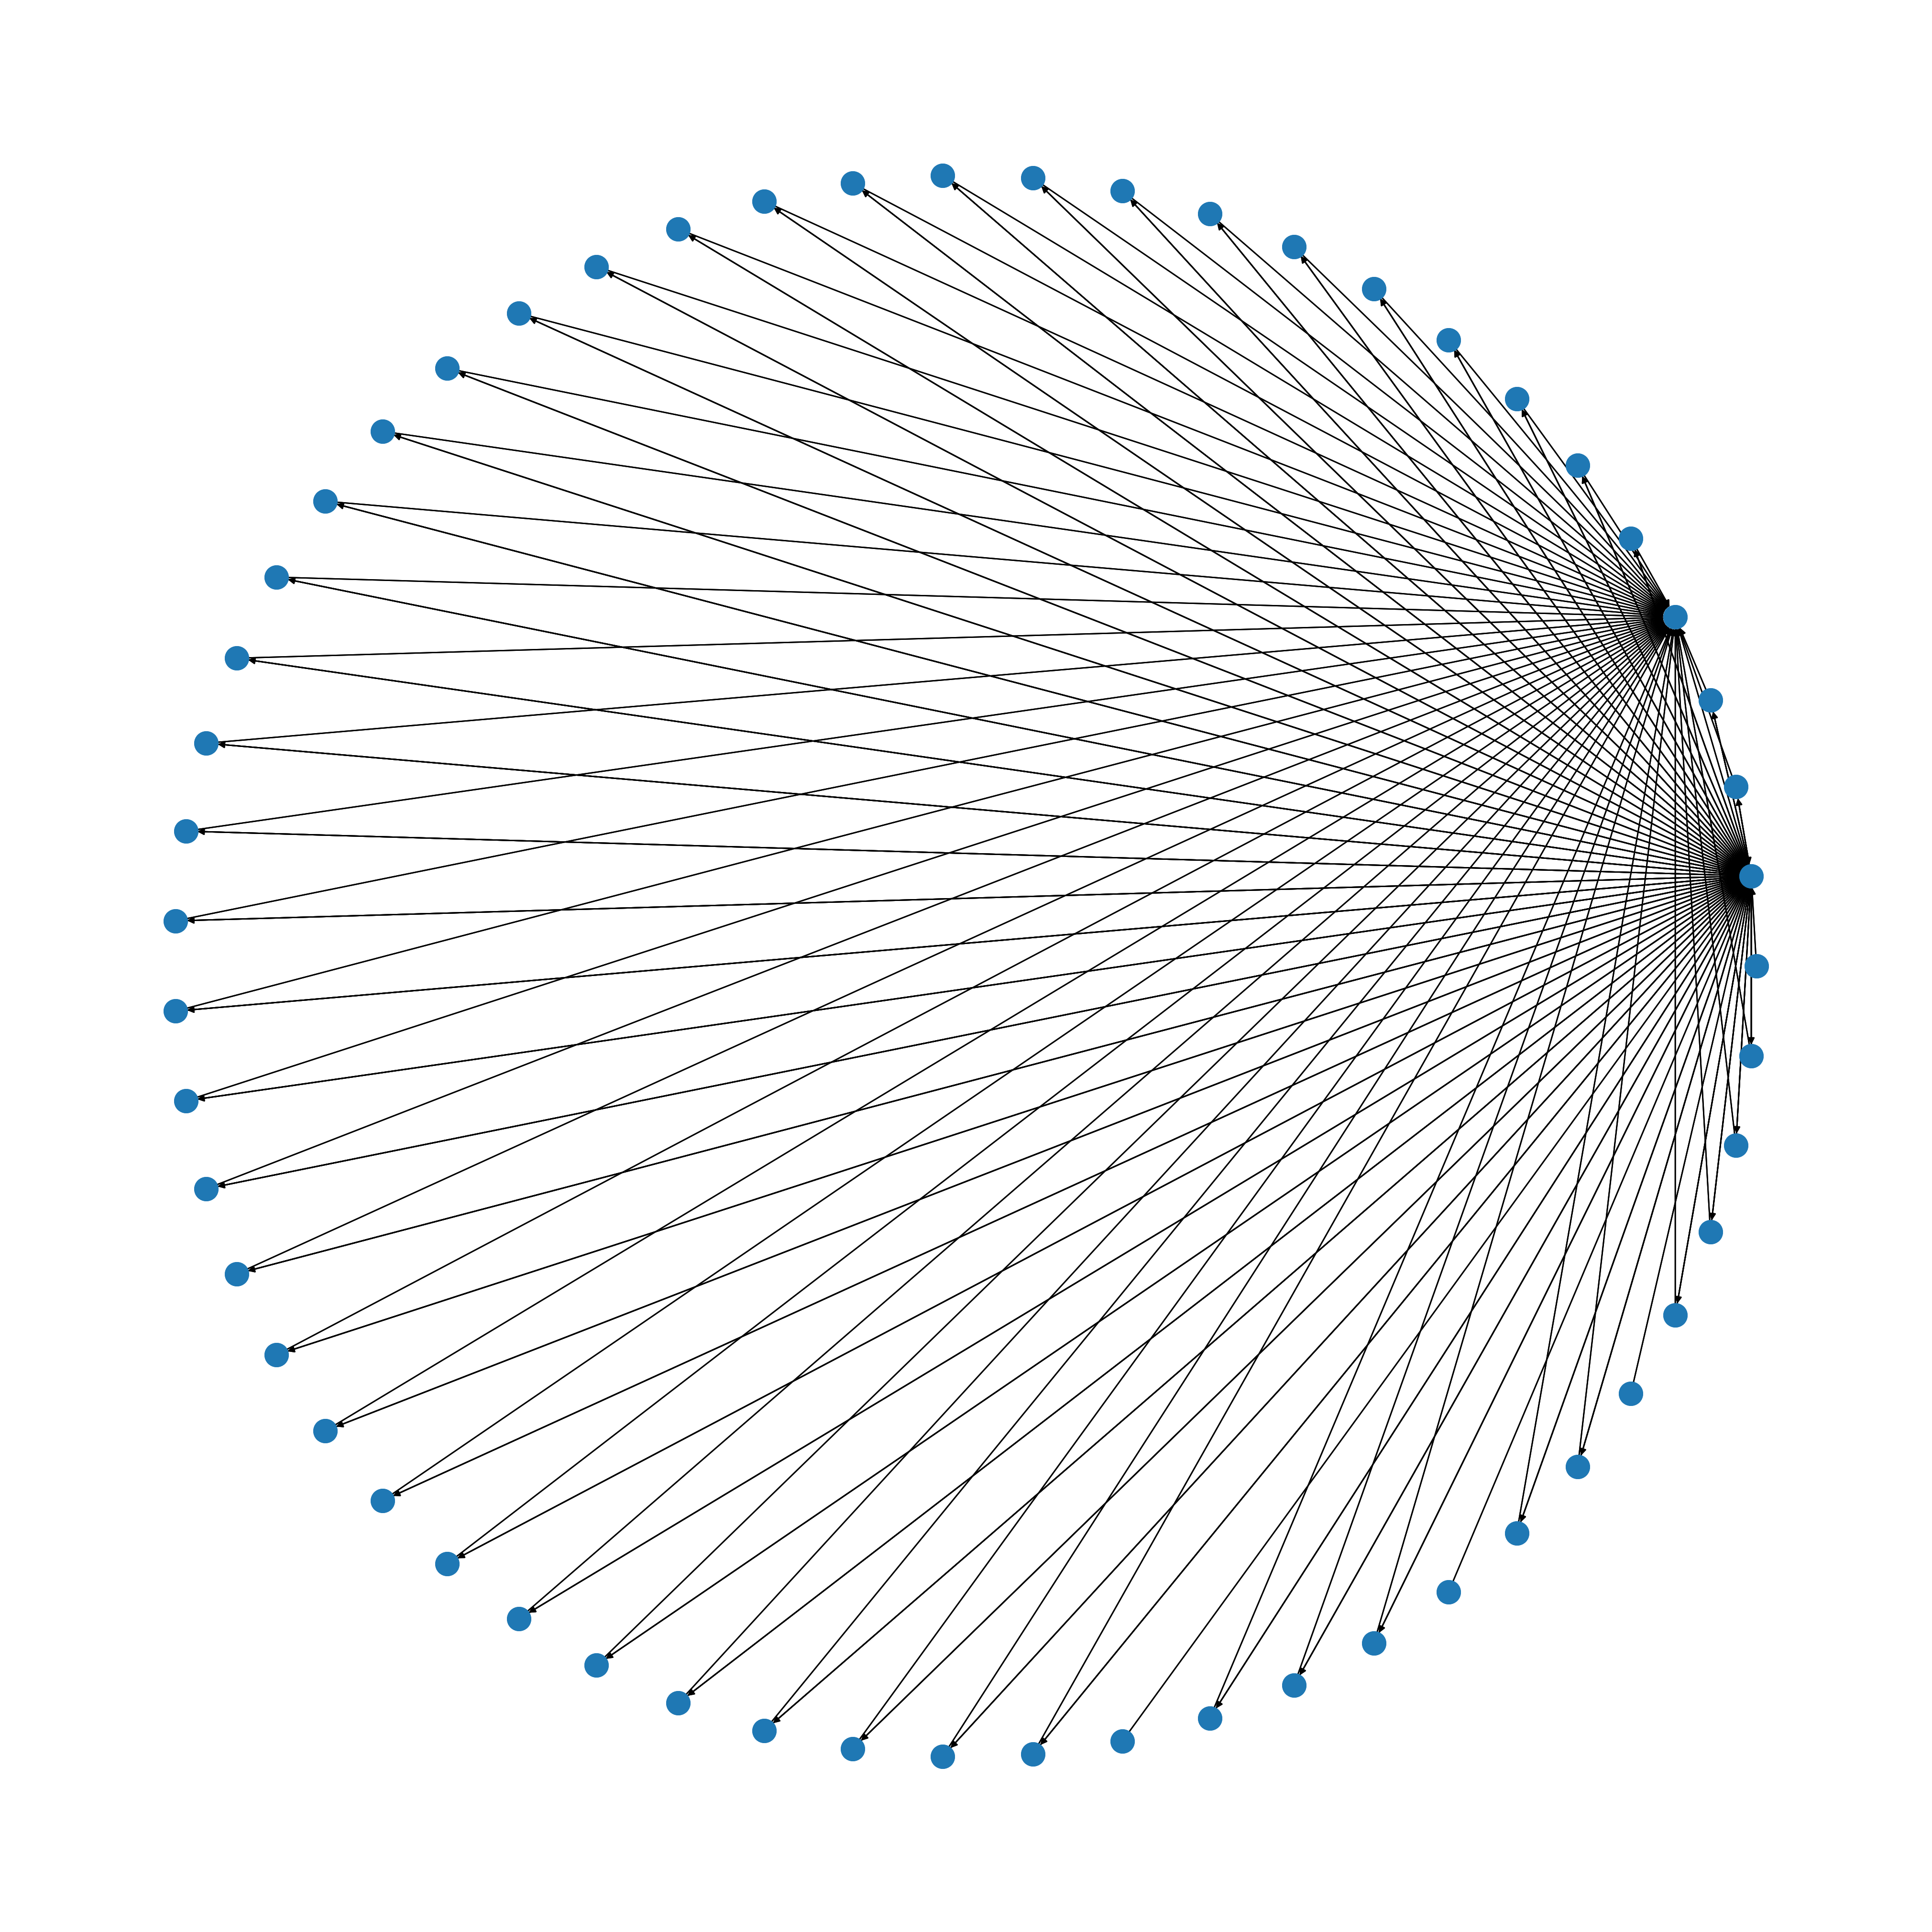

In [38]:
harmony_spam_reduced_unique = list(set(zip(harmony_spam_reduced, list(harmony_reduced_to), list(harmony_reduced["swap_hash"]))))
for G, to_address, hash in harmony_spam_reduced_unique:
    if G == "DEX":
        print("DEX")
    else:
        result = is_spam2(G, to_address)
        if result[0]:
            print(hash)
            print(result)
            fig = plt.figure(3, figsize=(20, 20), dpi=200)
            nx.draw_circular(G)
            plt.savefig("graphs/" + to_address + ".png", transparent=True)

In [39]:
CAs = "0x6fB25f3D3ed5A048cB50E50B0eADcEb49087ad7B","0xfc2E3B2e7f81B4f01e05C465509a5e256354C434", "0x4b8E29C1162Bc583A00ADBAF741891bB04Aedf37" , "0x564DAFa3424aCfe49419a0EFe96D2758fB6A1dF4" ,"0x6fB25f3D3ed5A048cB50E50B0eADcEb49087ad7B" , "0xe5B21f200a8a39E6b677080995Cd5a0e494FF3d2"


spams_eight = get_fromANDto(CAs)

C:\Users\Tom\.conda\envs\AKNUM\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


progress 0/6
1-th out of 2 hops, 1-th input out of 1
12229 incoming
0
1
2
3
4
5
6
7
8
9
2-th out of 2 hops, 1-th input out of 48
2 incoming
0
2-th out of 2 hops, 2-th input out of 48
2 incoming
0
2-th out of 2 hops, 3-th input out of 48
2 incoming
0
2-th out of 2 hops, 4-th input out of 48
2 incoming
0
2-th out of 2 hops, 5-th input out of 48
2 incoming
0
2-th out of 2 hops, 6-th input out of 48
2 incoming
0
2-th out of 2 hops, 7-th input out of 48
2 incoming
0
2-th out of 2 hops, 8-th input out of 48
10 incoming
0
2-th out of 2 hops, 9-th input out of 48
2 incoming
0
2-th out of 2 hops, 10-th input out of 48
2 incoming
0
2-th out of 2 hops, 11-th input out of 48
2 incoming
0
2-th out of 2 hops, 12-th input out of 48
2 incoming
0
2-th out of 2 hops, 13-th input out of 48
7 incoming
0
2-th out of 2 hops, 14-th input out of 48
2 incoming
0
2-th out of 2 hops, 15-th input out of 48
2 incoming
0
2-th out of 2 hops, 16-th input out of 48
2 incoming
0
2-th out of 2 hops, 17-th input out of 4

In [45]:
spams_with_to = list(set(zip(spams_eight, CAs)))
for G, to_address in spams_with_to:
    if G == "DEX":
        print("DEX")
    else:
        result = is_spam2(G, to_address)
        print(hash)
        print(result)

0x657a125dad64f68a6089e01d65d107aa1506a55bfdbfb3881f19daf21b52b028
(True, ('0xEdcac631208139dEd732ba8623F583F1215feEcA', 41), '0x6fB25f3D3ed5A048cB50E50B0eADcEb49087ad7B')
0x657a125dad64f68a6089e01d65d107aa1506a55bfdbfb3881f19daf21b52b028
(True, ('0x3DCa07E16B2Becd3eb76a9F9CE240B525451f887', 201), '0xe5B21f200a8a39E6b677080995Cd5a0e494FF3d2')
0x657a125dad64f68a6089e01d65d107aa1506a55bfdbfb3881f19daf21b52b028
(False, ('0x1fcE2c0fEa14ba58a7AD99290f29E4ED2b6a3cFe', 1), '0x564DAFa3424aCfe49419a0EFe96D2758fB6A1dF4')
0x657a125dad64f68a6089e01d65d107aa1506a55bfdbfb3881f19daf21b52b028
(False, ('0x71C84C335FB82a0536BD6e57d7110dF5Cb7c9ac3', 6), '0xfc2E3B2e7f81B4f01e05C465509a5e256354C434')
0x657a125dad64f68a6089e01d65d107aa1506a55bfdbfb3881f19daf21b52b028
(False, ('0xaF2ECf0C5da26fC6bD350187580fa693b79cdDA0', 1), '0x4b8E29C1162Bc583A00ADBAF741891bB04Aedf37')


C:\Users\Tom\.conda\envs\AKNUM\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [23]:
a = "0x20B0facbA605454547fb0d12E3f38446B2EAc9a7"
a in harmony_reduced_to

False

In [24]:
import pickle as pkl

with open('graphs.pickle', 'wb') as handle:
    pkl.dump(harmony_spam_reduced, handle)

In [25]:
#0x7E506951f196Bc4504aB4557BB856d1043497C0B HRC20 and JOC
#spams = get_fromANDto(swap_times)
#print(spams)

## Ploting graphs

In [26]:
CA2 = "0xe11C3cE2B96328B10d34DB9AC3ADd4ecc2942D07"
G_eight2 = n_hop_in_txes(CA2, 2)

1-th out of 2 hops, 1-th input out of 1
34 incoming
0
2-th out of 2 hops, 1-th input out of 34
1 incoming
0
2-th out of 2 hops, 2-th input out of 34
1 incoming
0
2-th out of 2 hops, 3-th input out of 34
1 incoming
0
2-th out of 2 hops, 4-th input out of 34
1 incoming
0
2-th out of 2 hops, 5-th input out of 34
1 incoming
0
2-th out of 2 hops, 6-th input out of 34
1 incoming
0
2-th out of 2 hops, 7-th input out of 34
1 incoming
0
2-th out of 2 hops, 8-th input out of 34
1 incoming
0
2-th out of 2 hops, 9-th input out of 34
1 incoming
0
2-th out of 2 hops, 10-th input out of 34
1 incoming
0
2-th out of 2 hops, 11-th input out of 34
1 incoming
0
2-th out of 2 hops, 12-th input out of 34
1 incoming
0
2-th out of 2 hops, 13-th input out of 34
1 incoming
0
2-th out of 2 hops, 14-th input out of 34
1 incoming
0
2-th out of 2 hops, 15-th input out of 34
1 incoming
0
2-th out of 2 hops, 16-th input out of 34
1 incoming
0
2-th out of 2 hops, 17-th input out of 34
1 incoming
0
2-th out of 2 hops, 

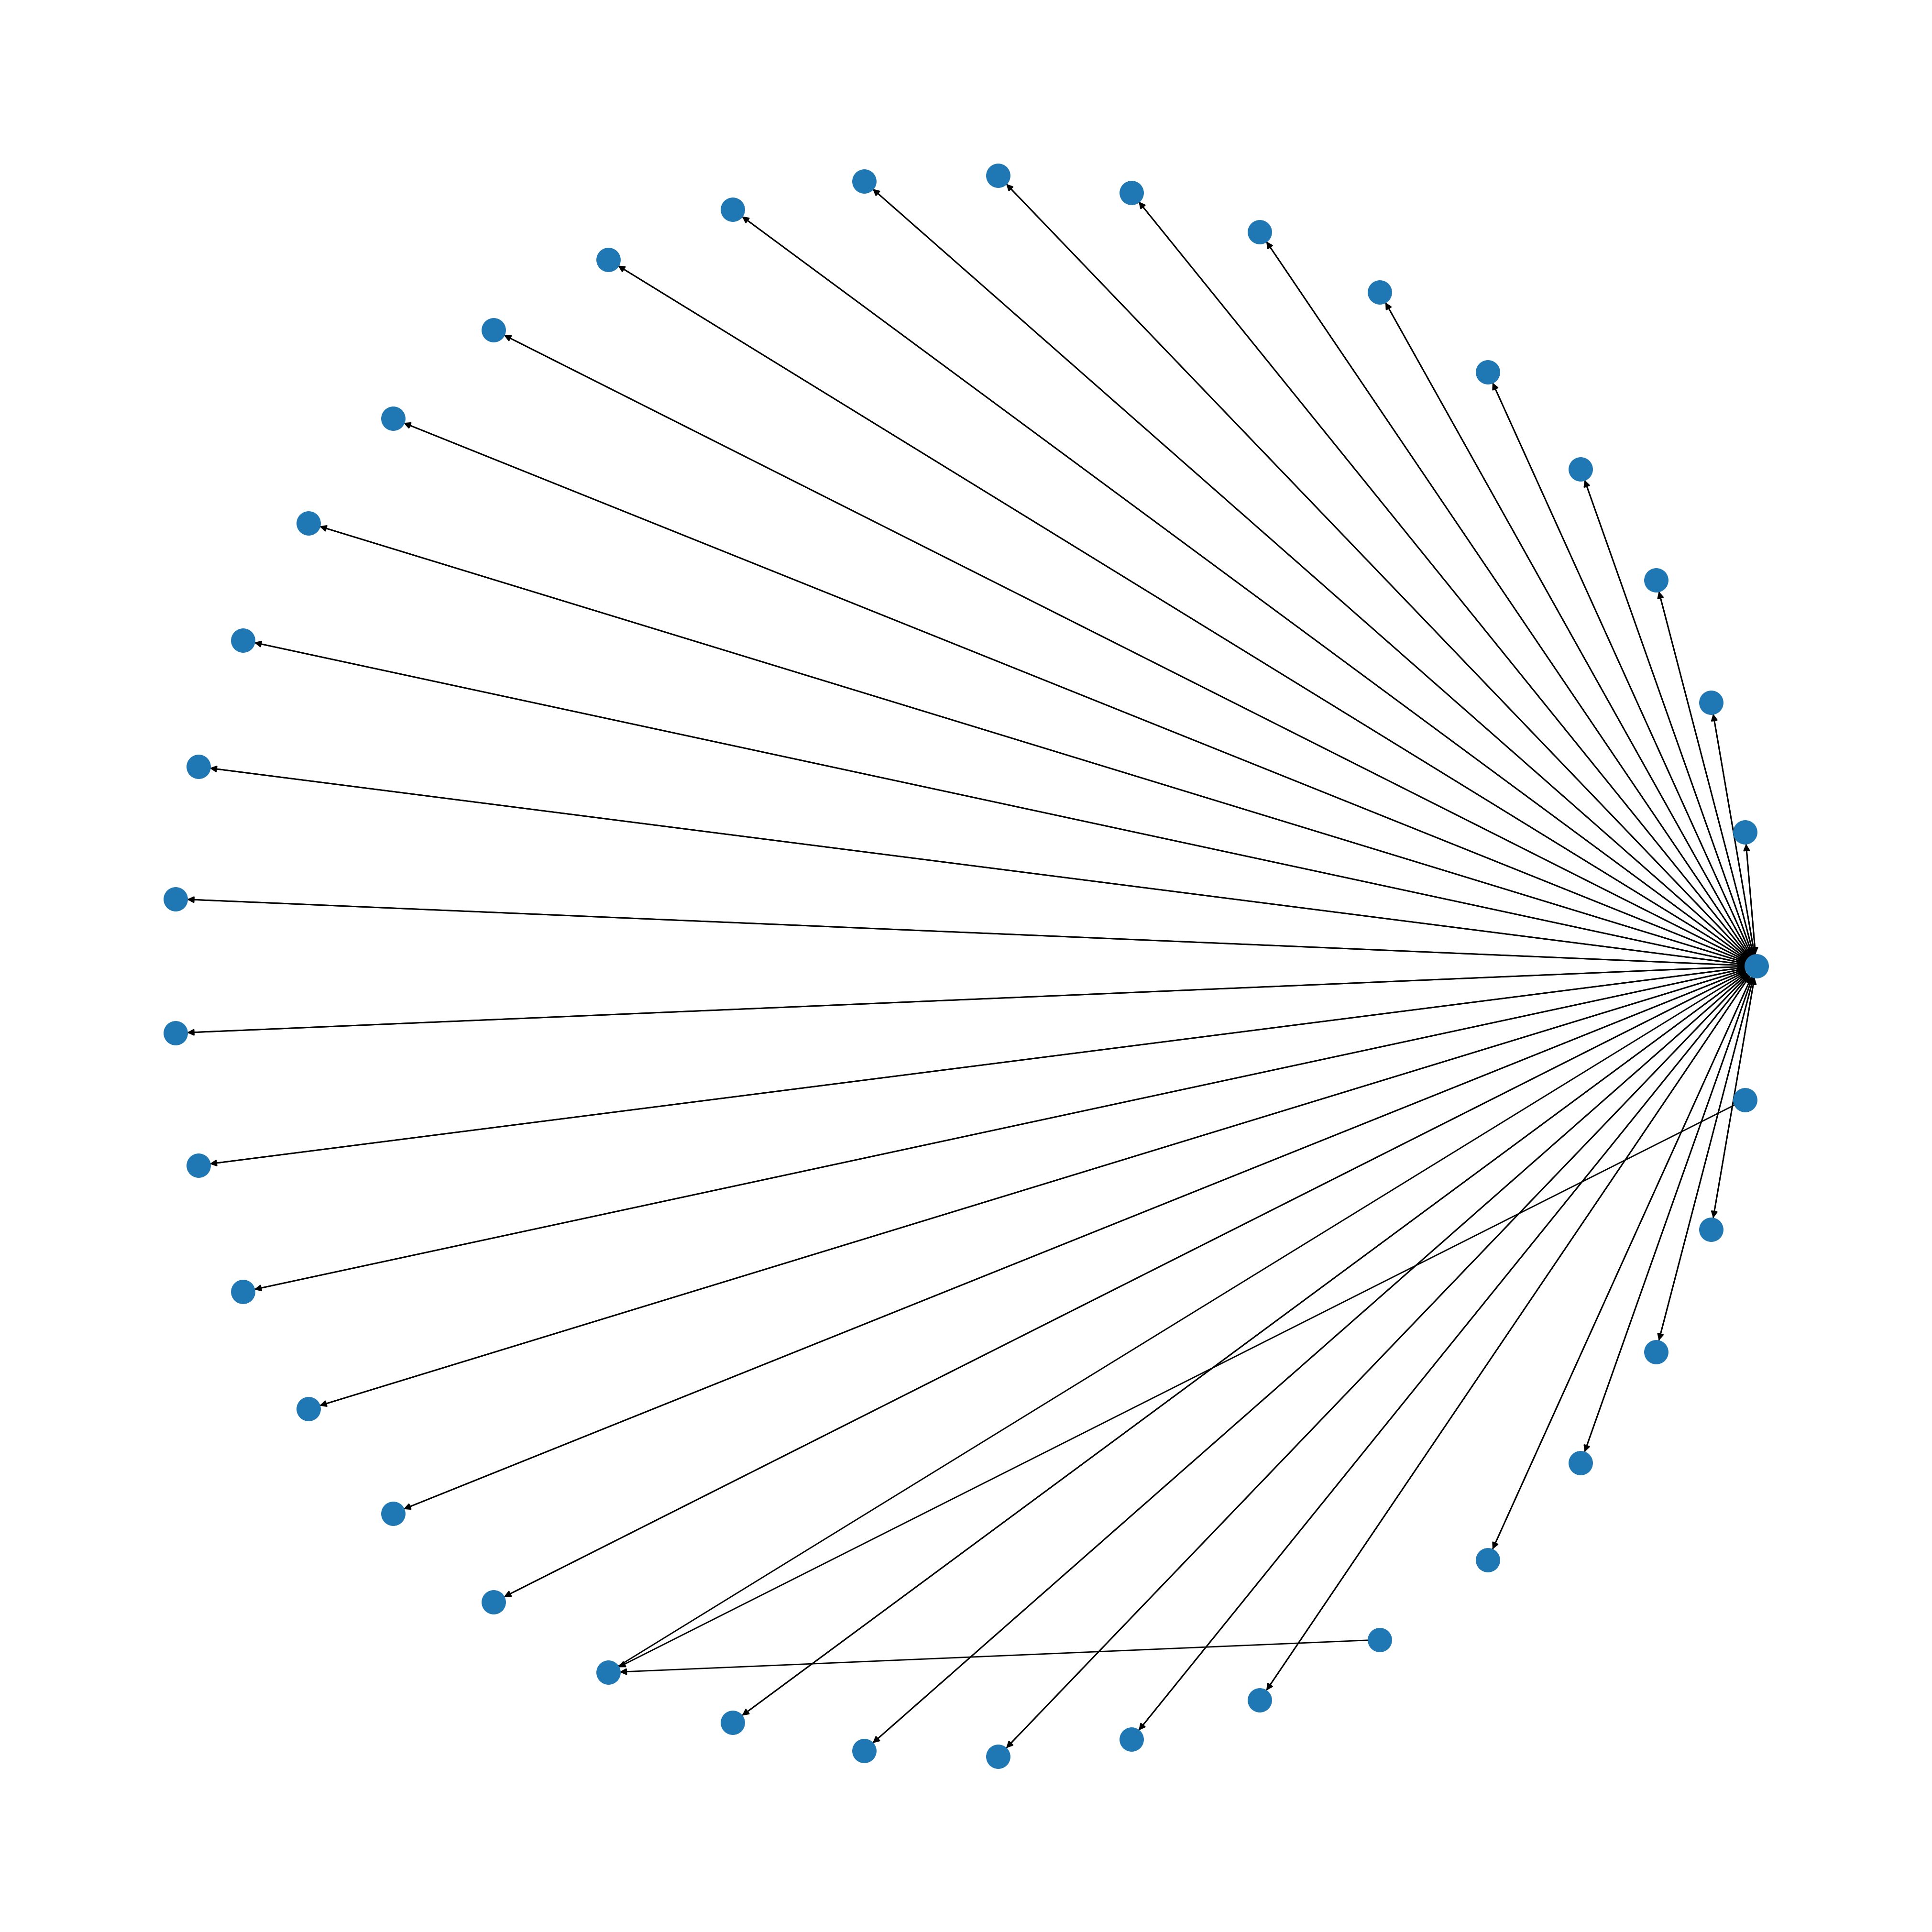

In [27]:
fig = plt.figure(3, figsize=(20, 20), dpi=200)
nx.draw_circular(G_eight2)
plt.show()